In [117]:
#################################################### BASIC LIB ####################################################
import pandas as pd
import numpy as np
from pathlib import Path
import os
import string
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

#################################################### METRICS ####################################################
from sklearn.metrics import (balanced_accuracy_score,f1_score,accuracy_score,make_scorer, silhouette_score, 
                             confusion_matrix, ConfusionMatrixDisplay)

#################################################### Feature Engineering ####################################################
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

#################################################### CT ####################################################
import sklearn.pipeline as sk_pipe
from sklearn.compose import ColumnTransformer

#################################################### Train,Test,Split; GSCV, CV ####################################################
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from tqdm import tqdm

#################################################### MODELS ####################################################
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, 
                              HistGradientBoostingClassifier, StackingClassifier, VotingClassifier)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from sklearn.naive_bayes import BernoulliNB, CategoricalNB, GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.neural_network import MLPClassifier

#################################################### Imbalance Handling ####################################################
from imblearn.combine import SMOTETomek
import imblearn.pipeline as imb_pipe

In [2]:

filepath_os = Path(os.path.join('F:/','Dataset','Scania Truck APS Failure','aps_failure_training_set.csv'))
print(filepath_os)
df = pd.read_csv(filepath_os)

F:\Dataset\Scania Truck APS Failure\aps_failure_training_set.csv


In [3]:
# df = pd.read_csv('https://raw.githubusercontent.com/Raj-Narayanan-B/Dataset/main/Scania%20Truck%20APS%20Failure/aps_failure_training_set.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [5]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [6]:
cols = df.columns.tolist()[1:]

In [7]:
# col=list(df.columns)
# for k in col:
#     lst=[]
#     strng='1'
#     null_list=['na','nan','null']
#     for i in range(len(df[k])):
#         strng=str(df[k][i])
#         for l in strng:
#             for a in null_list:
#                 if (strng.casefold()==a):
#                     lst.append(strng)
#             if (strng.isdigit()):
#                 i+=1
#             elif (strng.isalpha()):
#                 if (not(l in string.ascii_letters)):
#                     lst.append(strng)
#                 i+=1
#             else:
#                 if (not(l in string.digits)):
#                     try:
#                         if isinstance(float(strng),float):
#                             i+=1
#                     except:
#                         lst.append(strng)
#     if (len(lst)!=0):
#         print (k,"\n",pd.unique(lst),"\n")

In [8]:
# for i in cols:
#     df[i]=pd.to_numeric(df[i],errors='coerce',downcast='integer')

In [9]:
for i in cols:
    df[i].replace('na',np.nan,inplace=True)

In [10]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [11]:
for i in cols:
    df[i]=df[i].astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(170), object(1)
memory usage: 78.3+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
aa_000,60000.0,5.933650e+04,1.454301e+05,0.0,834.0,30776.0,48668.0,2.746564e+06
ab_000,13671.0,7.131885e-01,3.478962e+00,0.0,0.0,0.0,0.0,2.040000e+02
ac_000,56665.0,3.560143e+08,7.948749e+08,0.0,16.0,152.0,964.0,2.130707e+09
ad_000,45139.0,1.906206e+05,4.040441e+07,0.0,24.0,126.0,430.0,8.584298e+09
ae_000,57500.0,6.819130e+00,1.615434e+02,0.0,0.0,0.0,0.0,2.105000e+04
...,...,...,...,...,...,...,...,...
ee_007,59329.0,3.462714e+05,1.728056e+06,0.0,110.0,41098.0,167814.0,1.195801e+08
ee_008,59329.0,1.387300e+05,4.495100e+05,0.0,0.0,3812.0,139724.0,1.926740e+07
ee_009,59329.0,8.388915e+03,4.747043e+04,0.0,0.0,0.0,2028.0,3.810078e+06
ef_000,57276.0,9.057895e-02,4.368855e+00,0.0,0.0,0.0,0.0,4.820000e+02


In [14]:
df['class'].unique()

array(['neg', 'pos'], dtype=object)

In [15]:
df['class']=df['class'].map({'neg':0,'pos':1})

In [16]:
df['class'].value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(170), int64(1)
memory usage: 78.3 MB


In [18]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874.0,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [19]:
# col_list = []
# for i in range(len(df.columns)):
#     col_list.append({df.columns[i]:str(df[df.columns[i]].dtype)})

In [20]:
str(df[df.columns[0]].dtype).strip('64')

'int'

In [21]:
# col_list

In [22]:
# dict_cols_DB={}
# dict_cols_DB['Features'] = {}
# dict_cols_DB['Target'] = {}
# for i in df.columns:
#     if i =='class':
#         dict_cols_DB['Target'][i] = 'text'
#     elif i == 'aa_000':
#         dict_cols_DB['Features'][i]='int'
#     else:
#         dict_cols_DB['Features'][i]='text'

# import yaml
# yaml.dump(dict_cols_DB, 
#           stream = open('sample_schema_for_DB.yaml','w'),
#           indent = 4)

In [23]:
# ############## 
# # To create the schema.yaml

# dict_cols={}
# dict_cols['Features'] = {}
# dict_cols['Target'] = {}
# for i in df.columns:
#     if i =='class':
#         dict_cols['Target'][i] = str(df[i].dtypes)
#     else:
#         dict_cols['Features'][i]=str(df[i].dtypes)

# import yaml
# yaml.dump(dict_cols, 
#           stream = open('sample_schema.yaml','w'),
#           indent = 4)

In [24]:
np.sort(df.isna().sum())

array([    0,     0,   167,   338,   338,   338,   473,   589,   589,
         589,   589,   629,   629,   629,   629,   629,   629,   642,
         642,   642,   642,   642,   645,   645,   669,   669,   669,
         669,   669,   669,   669,   669,   669,   669,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   671,   671,   671,   671,   671,   671,   671,
         671,   671,   676,   687,   687,   687,   687,   687,   687,
         687,   687,   687,   687,   688,   688,   688,   688,   688,
         688,   688,   688,   688,   688,   691,   691,   691,   691,
         726,   726,  2500,  2500,  2500,  2500,  2501,  2502,  2503,
        2503,  2723,  2723,  2723,  2723,  2723,  2723,  2724,  2724,
        2724,  2724,  2724,  2725,  2726,  2726,  2726,  2726,  2726,
        2727,  2727,

<Axes: >

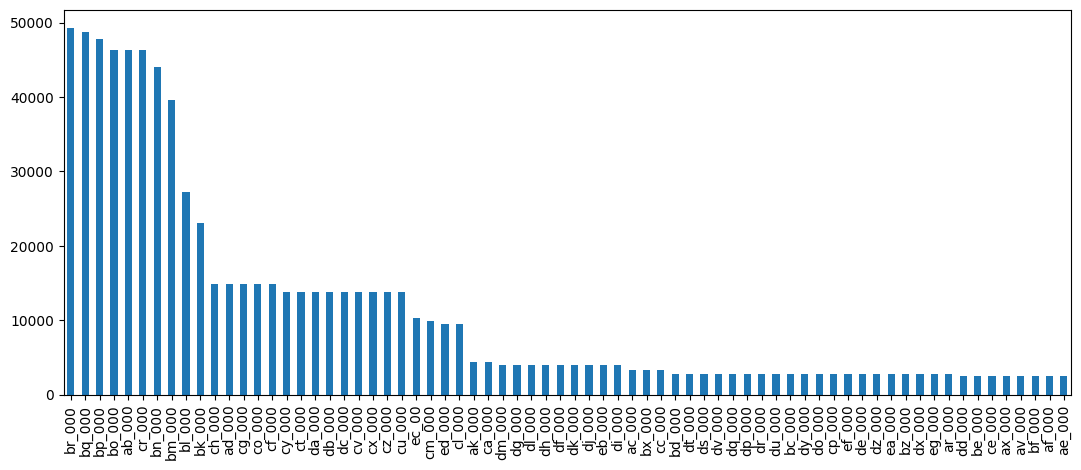

In [25]:
df.isna().sum()[df.isna().sum()>2000].sort_values(ascending=False).plot(kind='bar',figsize=(13,5))

In [26]:
df['br_000'].shape

(60000,)

In [27]:
df.shape

(60000, 171)

In [28]:
(df.isna().sum()[df.isna().sum()>30000]/60000)*100

ab_000    77.215000
bm_000    65.915000
bn_000    73.348333
bo_000    77.221667
bp_000    79.566667
bq_000    81.203333
br_000    82.106667
cr_000    77.215000
dtype: float64

In [29]:
pd.DataFrame(data=(df.isna().sum()[df.isna().sum()>30000],(df.isna().sum()[df.isna().sum()>30000]/60000)*100)).T.sort_values(by=1,ascending=False)

,0,1
br_000,49264.0,82.106667
bq_000,48722.0,81.203333
bp_000,47740.0,79.566667
bo_000,46333.0,77.221667
ab_000,46329.0,77.215000
cr_000,46329.0,77.215000
bn_000,44009.0,73.348333
bm_000,39549.0,65.915000


In [30]:
describe_cols = df.isna().sum()[df.isna().sum()>30000].index
df[describe_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ab_000,13671.0,0.713189,3.478962,0.0,0.0,0.0,0.0,204.0
bm_000,20451.0,399603.167571,407071.846632,0.0,172210.0,239140.0,369100.0,1310700.0
bn_000,15991.0,463710.833594,464447.341741,0.0,171720.0,251400.0,493100.0,1310700.0
bo_000,13667.0,513147.820297,497353.671372,0.0,170550.0,270660.0,1310700.0,1310700.0
bp_000,12260.0,551389.799347,519611.447203,0.0,172170.0,288320.0,1310700.0,1310700.0
bq_000,11278.0,582871.322930,536697.028750,0.0,170420.0,305100.0,1310700.0,1310700.0
br_000,10736.0,604886.613264,547227.872331,0.0,169470.0,320400.0,1310700.0,1310700.0
cr_000,13671.0,37.062980,1027.001381,0.0,0.0,0.0,0.0,57450.0


In [31]:
df.drop(columns=describe_cols,axis = 1, inplace = True)

In [32]:
df.shape

(60000, 163)

In [33]:
missing_data_index_2000 = df.isna().sum()[df.isna().sum()>2000].sort_values(ascending=False).index

In [34]:
len(missing_data_index_2000)

62

In [35]:
# plt.figure(figsize = (15,20))
# for i in range(len(missing_data_index_2000)):
#     plt.subplot (10,7,i+1)
#     boxplot_object = sns.boxplot(df[missing_data_index_2000[i]])
# # plt.tight_layout()
# plt.show()

In [36]:
# plt.figure(figsize = (15,20))
# for i in range(len(missing_data_index_2000)):
#     plt.subplot (10,7,i+1)
#     sns.kdeplot(df[missing_data_index_2000[i]])
#     plt.tight_layout()
# plt.show()

* 1st, treat the missing values
* 2nd, treat the outliers

In [37]:
df.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [38]:
x = df.drop('class',axis = 1)
y = df['class']

In [39]:
print('X shape',x.shape,'\n','Y shape',y.shape)

X shape (60000, 162) 
 Y shape (60000,)


In [40]:
y.value_counts()

class
0    59000
1     1000
Name: count, dtype: int64

In [41]:
print('X shape',x.shape,'\n','Y shape',y.shape)

X shape (60000, 162) 
 Y shape (60000,)


#### Creating the pipelines

In [42]:
# pipeline_ = sk_pipe.Pipeline(steps=[('Knn_imputer',KNNImputer()),
#                             ('Robust_Scaler',RobustScaler())],
#                             verbose= True)
# pipeline_

In [43]:
# x_imputed = pipeline_.fit_transform(X = x, y = y)

In [44]:
# pd.DataFrame(x_imputed,columns=pipeline_.get_feature_names_out()).isna().sum().unique()

In [45]:
# y.iloc[:10000].value_counts()

In [46]:
# xtrain,xtest,ytrain,ytest = train_test_split(pd.DataFrame(x_imputed,columns=pipeline_.get_feature_names_out()),
#                                              y,
#                                              test_size=0.25,
#                                              random_state = 8)
# xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

In [47]:
# models = {'Logistic_Regression': LogisticRegression(), 
#           'SGD_Classifier': SGDClassifier(),
#           'Random Forest': RandomForestClassifier(), 
#           'Ada_Boost': AdaBoostClassifier(), 
#           'Grad_Boost': GradientBoostingClassifier(), 
#           'Bagging_Classifier': BaggingClassifier(), 
#           'ExtraTreesClassifier': ExtraTreesClassifier(), 
#           'Hist_Grad_Boost_Classifier': HistGradientBoostingClassifier(), 
#         #   'Stacking_Classifier': StackingClassifier(), 
#         #   'Voting_Classifier': VotingClassifier(),
#           'Decision_Tree_Classifier': DecisionTreeClassifier(),
#           'XGB_Classifier': XGBClassifier(),
#           'KNN_Classifier': KNeighborsClassifier(),
#           # 'Linear_SVC': LinearSVC(), 
#           # 'SVC': SVC(), 
#           # 'NuSVC': NuSVC(),
#           'MLP_Classifier': MLPClassifier()
# }

# balanced_accuracy_score_satharan = {}
# f1_score_satharan = {}
# accuracy_score_satharan = {}
# cost_satharan = {}

# for model_name,model in models.items():
#     print(model_name)
#     model.fit(xtrain,ytrain)
#     y_pred_ = model.predict(xtest)

#     balanced_accuracy_score_satharan[model_name] = balanced_accuracy_score(y_true = ytest,y_pred = y_pred_)
#     print(f'Balanced_accuracy_score: {balanced_accuracy_score_satharan[model_name]}')

#     f1_score_satharan[model_name] = f1_score(y_true = ytest, y_pred = y_pred_)
#     print(f'f1_score: {f1_score_satharan[model_name]}')

#     accuracy_score_satharan[model_name] = accuracy_score(y_true = ytest, y_pred = y_pred_)
#     print(f'Accuracy_score: {accuracy_score_satharan[model_name]}')

#     tn, fp, fn, tp = confusion_matrix(y_true = ytest,y_pred = y_pred_).ravel()
#     cost = (10*fp)+(500*fn)
#     cost_satharan[model_name] = cost
#     print(f'Cost: {cost_satharan[model_name]}\n')

In [48]:
# models_df_satharan = pd.DataFrame([balanced_accuracy_score_satharan,f1_score_satharan,accuracy_score_satharan,cost_satharan]).T
# models_df_satharan.columns = ['Balanced_accuracy_score','F1_score','Accuracy_score','Cost']
# models_df_satharan.sort_values(by = 'Balanced_accuracy_score',ascending=False)

## With SMOTE

### Using: 
    * train_test_split on train data into training_set & testing_set
    * Then using the pipeline on training_set (fit_transform) and using the same pipeline to only transform the testing_set(transform)
    * Then checking the best model using the training_set
    * Then loading the actual test data and transforming it using the pipeline fitted on train data's training_set
    * Then checking the best models' performance on test data to check the cost

In [ ]:
# pipeline_smote = imb_pipe.Pipeline(steps=[('Knn_imputer',KNNImputer()),
#                             ('Robust_Scaler',RobustScaler()),
#                             ('SMOTE',SMOTETomek(n_jobs=-1,sampling_strategy='minority',random_state=8))],
#                             verbose=True)
# pipeline_smote

In [49]:
pipeline_ = sk_pipe.Pipeline(steps=[('Knn_imputer',KNNImputer()),
                            ('Robust_Scaler',RobustScaler())],
                            verbose= True)
pipeline_

Pipeline(steps=[('Knn_imputer', KNNImputer()),
                ('Robust_Scaler', RobustScaler())],
         verbose=True)

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 random_state=8,
                                                 test_size=0.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((45000, 162), (15000, 162), (45000,), (15000,))

#### Fitting preprocessor on train data

In [51]:
x_new = pipeline_.fit_transform(X = x_train, y = y_train)

[Pipeline] ....... (step 1 of 2) Processing Knn_imputer, total=13.9min
[Pipeline] ..... (step 2 of 2) Processing Robust_Scaler, total=   0.4s


In [52]:
x_new_ = pd.DataFrame(x_new,columns=pipeline_.get_feature_names_out())
x_new_.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.642451,-1.184896e-01,-0.130475,0.0,0.0,0.0,0.0,0.0,0.0,-0.069832,...,-0.526041,-0.513180,-0.473342,-0.472343,-0.341972,-0.246246,-0.028521,0.000000,0.0,0.0
1,-0.647499,-9.114583e-02,-0.335508,0.0,0.0,0.0,0.0,0.0,0.0,-0.017528,...,-0.534668,-0.516161,-0.478409,-0.477425,-0.343333,-0.247308,-0.028967,0.000000,0.0,0.0
2,-0.646405,-5.468750e-02,-0.205033,0.0,0.0,0.0,0.0,0.0,0.0,-0.071353,...,-0.532134,-0.515376,-0.478107,-0.477340,-0.343407,-0.247344,-0.028967,0.000000,0.0,0.0
3,0.221708,4.895833e-01,1.421249,0.0,0.0,0.0,0.0,0.0,0.0,-0.074274,...,0.464558,0.657849,0.963705,0.682570,0.064683,-0.110265,-0.007891,0.000000,0.0,0.0
4,-0.647204,1.387179e+06,-0.344828,0.0,0.0,0.0,0.0,0.0,0.0,-0.075595,...,-0.533917,-0.516105,-0.478405,-0.477400,-0.343165,-0.245686,-0.028967,0.089216,0.0,0.0


In [53]:
smote = SMOTETomek(n_jobs=-1,sampling_strategy='minority',random_state=8)

In [54]:
x_smote, y_smote = smote.fit_resample(X = x_new_,
                   y = y_train)

In [55]:
x_smote_ = pd.DataFrame(x_smote)

In [56]:
y_smote_ = pd.DataFrame(y_smote)

#### Using the same preprocessor on test data and using just transform()

In [57]:
x_test_new = pipeline_.transform(X = x_test)

In [58]:
x__test_smote, y_test_smote = smote.fit_resample(X = x_test_new,
                   y = y_test)

In [59]:
x__test_smote_ =pd.DataFrame(x__test_smote,columns = x_test.columns)
y_test_smote_ = pd.DataFrame(y_test_smote,columns = ['class'])

In [60]:
y_test_smote_.head()

,class
0,0
1,0
2,0
3,0
4,0


In [61]:
x__test_smote_.shape

(29392, 162)

In [62]:
# x_train,x_test,y_train,y_test = train_test_split(pd.DataFrame(x_smote,columns=pipeline_smote.get_feature_names_out()),
#                                                  pd.DataFrame(y_smote),
#                                                  random_state=8,
#                                                  test_size=0.25)
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [63]:
x_smote_.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.642451,-1.184896e-01,-0.130475,0.0,0.0,0.0,0.0,0.0,0.0,-0.069832,...,-0.526041,-0.513180,-0.473342,-0.472343,-0.341972,-0.246246,-0.028521,0.000000,0.0,0.0
1,-0.647499,-9.114583e-02,-0.335508,0.0,0.0,0.0,0.0,0.0,0.0,-0.017528,...,-0.534668,-0.516161,-0.478409,-0.477425,-0.343333,-0.247308,-0.028967,0.000000,0.0,0.0
2,-0.646405,-5.468750e-02,-0.205033,0.0,0.0,0.0,0.0,0.0,0.0,-0.071353,...,-0.532134,-0.515376,-0.478107,-0.477340,-0.343407,-0.247344,-0.028967,0.000000,0.0,0.0
3,0.221708,4.895833e-01,1.421249,0.0,0.0,0.0,0.0,0.0,0.0,-0.074274,...,0.464558,0.657849,0.963705,0.682570,0.064683,-0.110265,-0.007891,0.000000,0.0,0.0
4,-0.647204,1.387179e+06,-0.344828,0.0,0.0,0.0,0.0,0.0,0.0,-0.075595,...,-0.533917,-0.516105,-0.478405,-0.477400,-0.343165,-0.245686,-0.028967,0.089216,0.0,0.0


In [64]:
y_smote_.head()

,class
0,0
1,0
2,0
3,0
4,0


In [65]:
x__test_smote_.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,4.436076,-2.864583e-02,-0.186393,0.0,0.0,0.0,0.0,0.0,582308.0,107.610341,...,1.708360,1.349142,1.109381,1.187278,3.011568,34.834743,3.465764,0.250980,0.0,0.0
1,3.104229,-1.184896e-01,0.976701,0.0,0.0,0.0,0.0,0.0,4106.0,15.801309,...,4.724863,4.175502,4.323871,2.834795,1.977932,1.466778,2.798661,6.559804,0.0,0.0
2,0.187635,1.387179e+06,0.093197,0.0,0.0,0.0,0.0,0.0,0.0,-0.047382,...,-0.187164,-0.202828,-0.143520,-0.022051,0.090081,0.464485,4.620901,34.871569,0.0,0.0
3,0.256328,1.341146e-01,0.452004,0.0,0.0,0.0,0.0,0.0,2662.0,5.460832,...,0.274762,0.273197,0.179394,0.244036,0.471478,0.748985,2.188298,6.785294,0.0,0.0
4,0.853201,2.018229e-01,0.442684,0.0,0.0,0.0,0.0,0.0,0.0,1.435420,...,1.140493,1.080753,0.964715,0.965162,1.232165,1.085111,1.730159,2.439216,0.0,0.0


In [66]:
models = {'Logistic_Regression': LogisticRegression(), 
          'SGD_Classifier': SGDClassifier(),
          'Random Forest': RandomForestClassifier(), 
          'Ada_Boost': AdaBoostClassifier(), 
          'Grad_Boost': GradientBoostingClassifier(), 
          'Bagging_Classifier': BaggingClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(), 
          'Hist_Grad_Boost_Classifier': HistGradientBoostingClassifier(), 
        #   'Stacking_Classifier': StackingClassifier(), 
        #   'Voting_Classifier': VotingClassifier(),
          'Decision_Tree_Classifier': DecisionTreeClassifier(),
          'XGB_Classifier': XGBClassifier(),
          'KNN_Classifier': KNeighborsClassifier(),
          # 'Linear_SVC': LinearSVC(), 
          # 'SVC': SVC(), 
          # 'NuSVC': NuSVC(),
          'MLP_Classifier': MLPClassifier()
}

balanced_accuracy_score_ = {}
f1_score_ = {}
accuracy_score_ = {}
cost_ = {}

for model_name,model in models.items():
    print(model_name)
    model.fit(x_smote_,y_smote_)
    y_pred_ = model.predict(x__test_smote_)

    balanced_accuracy_score_[model_name] = balanced_accuracy_score(y_true = y_test_smote_,y_pred = y_pred_)
    print(f'Balanced_accuracy_score: {balanced_accuracy_score_[model_name]}')

    f1_score_[model_name] = f1_score(y_true = y_test_smote_, y_pred = y_pred_)
    print(f'f1_score: {f1_score_[model_name]}')

    accuracy_score_[model_name] = accuracy_score(y_true = y_test_smote_, y_pred = y_pred_)
    print(f'Accuracy_score: {accuracy_score_[model_name]}')

    tn, fp, fn, tp = confusion_matrix(y_true = y_test_smote_,y_pred = y_pred_).ravel()
    cost = (10*fp)+(500*fn)
    cost_[model_name] = cost
    print(f'Cost: {cost_[model_name]}\n')

Logistic_Regression
Balanced_accuracy_score: 0.5981899836690256
f1_score: 0.6988166887687444
Accuracy_score: 0.5981899836690255
Cost: 605650

SGD_Classifier
Balanced_accuracy_score: 0.5548788786064235
f1_score: 0.5405766056817782
Accuracy_score: 0.5548788786064235
Cost: 3560340

Random Forest
Balanced_accuracy_score: 0.9706042460533478
f1_score: 0.9699352773331478
Accuracy_score: 0.9706042460533478
Cost: 380550

Ada_Boost
Balanced_accuracy_score: 0.9758437670114317
f1_score: 0.9758404791071186
Accuracy_score: 0.9758437670114317
Cost: 182030

Grad_Boost
Balanced_accuracy_score: 0.9770685900925422
f1_score: 0.9770451604114162
Accuracy_score: 0.9770685900925422
Cost: 179220

Bagging_Classifier
Balanced_accuracy_score: 0.9493399564507349
f1_score: 0.9470841181278652
Accuracy_score: 0.9493399564507349
Cost: 686680

ExtraTreesClassifier
Balanced_accuracy_score: 0.9678483941208492
f1_score: 0.9671109873664429
Accuracy_score: 0.9678483941208492
Cost: 402430

Hist_Grad_Boost_Classifier
Balanced

In [67]:
models_df_smote = pd.DataFrame([balanced_accuracy_score_,f1_score_,accuracy_score_,cost_]).T
models_df_smote.columns = ['Balanced_accuracy_score','F1_score','Accuracy_score','Cost']
models_df_smote.sort_values(by = 'Cost')

,Balanced_accuracy_score,F1_score,Accuracy_score,Cost
Grad_Boost,0.977069,0.977045,0.977069,179220.0
Ada_Boost,0.975844,0.975840,0.975844,182030.0
Hist_Grad_Boost_Classifier,0.981253,0.981033,0.981253,224050.0
XGB_Classifier,0.980641,0.980347,0.980641,252650.0
Random Forest,0.970604,0.969935,0.970604,380550.0
ExtraTreesClassifier,0.967848,0.967111,0.967848,402430.0
Logistic_Regression,0.598190,0.698817,0.598190,605650.0
Bagging_Classifier,0.949340,0.947084,0.949340,686680.0
MLP_Classifier,0.885581,0.885818,0.885581,842620.0
Decision_Tree_Classifier,0.929641,0.925429,0.929641,934040.0


In [68]:
# pipeline_final = imb_pipe.Pipeline(steps=[('Knn_imputer',KNNImputer()),
#                                           ('Robust_Scaler',RobustScaler()),
#                                           ('SMOTE',SMOTETomek(n_jobs=-1,sampling_strategy='minority',random_state=8)),
#                                           ('XGB_Classifier',XGBClassifier())],
#                             verbose=True)
# pipeline_final

In [ ]:
# pipeline_final.transform()

In [ ]:
# import pandas as pd
# df = pd.read_csv('../artifacts\data\processed\stage_2_processing\processed_train_data.csv')

In [ ]:
# df.head()

In [ ]:
# pd.unique(df.isna().sum())

In [ ]:
# df['class'].value_counts()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

In [ ]:
# for i in df.columns:
#     plt.figure(figsize=(15,7))
#     sns.boxplot(data = df,
#                 x=i)
#     plt.show()
    

#### Loading the actual test data

In [69]:
test_df = pd.read_csv('..\\artifacts\data\processed\stage_1_processing\preprocessed_test_data.csv')

In [70]:
test_df['class']

0        0
1        0
2        0
3        0
4        0
        ..
15995    0
15996    0
15997    0
15998    0
15999    0
Name: class, Length: 16000, dtype: int64

In [71]:
test_df.isna().sum().unique()

array([    0, 12363,   926,  3981,   690,   189,   175,   163,  1198,
         169,   162,   764,   688,   192,   193,   689,  6094,  7226,
       10546, 11713, 12376, 12721, 12981, 13129,   202,    28,   190,
         866,   107,   763,  1206,   865,   185,    86,  2459,  2578,
         194,  3718,  1094,   762,  2644], dtype=int64)

In [72]:
test_df['class'].value_counts()

class
0    15625
1      375
Name: count, dtype: int64

In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, aa_000 to eg_000
dtypes: float64(170), int64(1)
memory usage: 20.9 MB


In [74]:
test_df.drop(columns = 'class')

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60.0,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82.0,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002.0,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816.0,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814.0,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852.0,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18.0,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636.0,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110.0,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [75]:
test_df.drop(columns = describe_cols,inplace=True)

#### Using the fitted pipeline during training phase on this actual test data

In [76]:
test_x = pipeline_.transform(X = test_df.drop(columns = 'class'))

In [77]:
test_x_df = pd.DataFrame(test_x,columns = pipeline_.get_feature_names_out())

In [78]:
test_x_smote,test_y_smote = smote.fit_resample(X =test_x_df,
                                  y = test_df['class'])

In [79]:
test_y_smote.value_counts()

class
0    15593
1    15593
Name: count, dtype: int64

In [80]:
test_x_smote.shape

(31186, 162)

##### Checking with the best model performed during training

In [81]:
grad_boost_model = GradientBoostingClassifier()
grad_boost_model.fit(x_smote_,y_smote_)
y_pred_ = grad_boost_model.predict(x__test_smote_)

balanced_accuracy_score_ = balanced_accuracy_score(y_true = y_test_smote_,y_pred = y_pred_)
print(f'Balanced_accuracy_score: {balanced_accuracy_score_}')

f1_score_ = f1_score(y_true = y_test_smote_, y_pred = y_pred_)
print(f'f1_score: {f1_score_}')

accuracy_score_ = accuracy_score(y_true = y_test_smote_, y_pred = y_pred_)
print(f'Accuracy_score: {accuracy_score_}')

tn, fp, fn, tp = confusion_matrix(y_true = y_test_smote_,y_pred = y_pred_).ravel()
cost = (10*fp)+(500*fn)
cost_ = cost
print(f'Cost: {cost_}\n')


Balanced_accuracy_score: 0.977034567229178
f1_score: 0.9770118857065014
Accuracy_score: 0.977034567229178
Cost: 179230



In [82]:
y_test_pred = grad_boost_model.predict(test_x_smote)

In [83]:
balanced_accuracy_score_ = balanced_accuracy_score(y_true = y_test_pred, y_pred = test_y_smote)
print(f'Balanced_accuracy_score: {balanced_accuracy_score_}')

f1_score_ = f1_score(y_true = y_test_pred, y_pred = test_y_smote)
print(f'f1_score: {f1_score_}')

accuracy_score_ = accuracy_score(y_true = y_test_pred, y_pred = test_y_smote)
print(f'Accuracy_score: {accuracy_score_}')

tn, fp, fn, tp = confusion_matrix(y_true = y_test_pred, y_pred = test_y_smote).ravel()
cost = (10*fp)+(500*fn)
cost_ = cost
print(f'Cost: {cost_}\n')

Balanced_accuracy_score: 0.9817334173471588
f1_score: 0.9817658349328215
Accuracy_score: 0.9817225678188931
Cost: 163480



### Using: 
    * The pipeline on the entire train data
    * Then splitting it into train & test
    * Then checking the best model
    * Then loading the actual test data and transforming it using the pipeline fitted on train data
    * Then checking the best models' performance on test data to check the cost

#### Train_data

In [84]:
new_train_df = pd.read_csv('..//artifacts\data\processed\stage_1_processing\preprocessed_train_data.csv')

In [86]:
new_train_df.drop(columns = describe_cols,inplace=True)

In [87]:
new_train_df.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [89]:
new_train_x = new_train_df.drop(columns = 'class')
new_train_y = new_train_df['class']

In [93]:
pipeline_smote = sk_pipe.Pipeline(steps=[('Knn_imputer',KNNImputer()),
                            ('Robust_Scaler',RobustScaler())],
                            verbose= True)
pipeline_smote

Pipeline(steps=[('Knn_imputer', KNNImputer()),
                ('Robust_Scaler', RobustScaler())],
         verbose=True)

In [98]:
new_train_y

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: class, Length: 60000, dtype: int64

In [99]:
new_train_x_smote= pipeline_smote.fit_transform(X = new_train_x,
                                                                   y = new_train_y)

[Pipeline] ....... (step 1 of 2) Processing Knn_imputer, total=20.9min
[Pipeline] ..... (step 2 of 2) Processing Robust_Scaler, total=   0.3s


In [96]:
smote_new = SMOTETomek(n_jobs=-1,sampling_strategy='minority',random_state=8)

In [100]:
new_train_x_smote_, new_train_y_smote_ = smote_new.fit_resample(X = new_train_x_smote, 
                                                                y = new_train_y)

In [101]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_train_x_smote_,
                                                                    new_train_y_smote_,
                                                                    random_state = 8,
                                                                    test_size = 0.25)

In [102]:
models = {'Logistic_Regression': LogisticRegression(), 
          'SGD_Classifier': SGDClassifier(),
          'Random Forest': RandomForestClassifier(), 
          'Ada_Boost': AdaBoostClassifier(), 
          'Grad_Boost': GradientBoostingClassifier(), 
          'Bagging_Classifier': BaggingClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(), 
          'Hist_Grad_Boost_Classifier': HistGradientBoostingClassifier(), 
        #   'Stacking_Classifier': StackingClassifier(), 
        #   'Voting_Classifier': VotingClassifier(),
          'Decision_Tree_Classifier': DecisionTreeClassifier(),
          'XGB_Classifier': XGBClassifier(),
          'KNN_Classifier': KNeighborsClassifier(),
          # 'Linear_SVC': LinearSVC(), 
          # 'SVC': SVC(), 
          # 'NuSVC': NuSVC(),
          'MLP_Classifier': MLPClassifier()
}

balanced_accuracy_score_ = {}
f1_score_ = {}
accuracy_score_ = {}
cost_ = {}

for model_name,model in models.items():
    print(model_name)
    model.fit(new_X_train,new_y_train)
    y_pred_ = model.predict(new_X_test)

    balanced_accuracy_score_[model_name] = balanced_accuracy_score(y_true = new_y_test,y_pred = y_pred_)
    print(f'Balanced_accuracy_score: {balanced_accuracy_score_[model_name]}')

    f1_score_[model_name] = f1_score(y_true = new_y_test,y_pred = y_pred_)
    print(f'f1_score: {f1_score_[model_name]}')

    accuracy_score_[model_name] = accuracy_score(y_true = new_y_test,y_pred = y_pred_)
    print(f'Accuracy_score: {accuracy_score_[model_name]}')

    tn, fp, fn, tp = confusion_matrix(y_true = new_y_test,y_pred = y_pred_).ravel()
    cost = (10*fp)+(500*fn)
    cost_[model_name] = cost
    print(f'Cost: {cost_[model_name]}\n')

Logistic_Regression
Balanced_accuracy_score: 0.5959911547400627
f1_score: 0.6963798249866061
Accuracy_score: 0.595946221226319
Cost: 646740

SGD_Classifier
Balanced_accuracy_score: 0.6776276500132963
f1_score: 0.7337968154294685
Accuracy_score: 0.6775989678821213
Cost: 897090

Random Forest
Balanced_accuracy_score: 0.994364655569594
f1_score: 0.994386581901799
Accuracy_score: 0.9943640931622191
Cost: 12440

Ada_Boost
Balanced_accuracy_score: 0.9749441183044295
f1_score: 0.9749660786974219
Accuracy_score: 0.9749439804440823
Cost: 180840

Grad_Boost
Balanced_accuracy_score: 0.982685731035905
f1_score: 0.982792361157973
Accuracy_score: 0.9826848645345284
Cost: 83990

Bagging_Classifier
Balanced_accuracy_score: 0.9937873783295512
f1_score: 0.9938068970185117
Accuracy_score: 0.9937869219800367
Cost: 22410

ExtraTreesClassifier
Balanced_accuracy_score: 0.9928030918757343
f1_score: 0.9928412237455257
Accuracy_score: 0.9928023358457255
Cost: 13880

Hist_Grad_Boost_Classifier
Balanced_accuracy_

In [103]:
models_df_smote = pd.DataFrame([balanced_accuracy_score_,f1_score_,accuracy_score_,cost_]).T
models_df_smote.columns = ['Balanced_accuracy_score','F1_score','Accuracy_score','Cost']
models_df_smote.sort_values(by = 'Cost')

,Balanced_accuracy_score,F1_score,Accuracy_score,Cost
XGB_Classifier,0.996639,0.996647,0.996639,6870.0
Random Forest,0.994365,0.994387,0.994364,12440.0
ExtraTreesClassifier,0.992803,0.992841,0.992802,13880.0
Hist_Grad_Boost_Classifier,0.994772,0.994788,0.994772,15260.0
Bagging_Classifier,0.993787,0.993807,0.993787,22410.0
Decision_Tree_Classifier,0.988457,0.988511,0.988457,51420.0
KNN_Classifier,0.978002,0.978310,0.978000,60870.0
Grad_Boost,0.982686,0.982792,0.982685,83990.0
Ada_Boost,0.974944,0.974966,0.974944,180840.0
MLP_Classifier,0.925042,0.928423,0.925036,220530.0


#### Test_data

In [104]:
new_test_df = pd.read_csv('..//artifacts\data\processed\stage_1_processing\preprocessed_test_data.csv')
new_test_df.drop(columns = describe_cols,inplace=True)
new_test_x = new_test_df.drop(columns = 'class')
new_test_y = new_test_df['class']

In [106]:
new_test_x_smote = pipeline_smote.transform(X = new_test_x)

In [107]:
new_test_x_smote_, new_test_y_smote_ = smote_new.fit_resample(X = new_test_x_smote, y = new_test_y)

In [118]:
xgb = XGBClassifier()
xgb.fit(new_X_train,new_y_train)
y_pred_ = xgb.predict(new_X_test)

balanced_accuracy_score_ = balanced_accuracy_score(y_true = new_y_test,y_pred = y_pred_)
print(f'Balanced_accuracy_score: {balanced_accuracy_score_}')

f1_score_ = f1_score(y_true = new_y_test,y_pred = y_pred_)
print(f'f1_score: {f1_score_}')

accuracy_score_ = accuracy_score(y_true = new_y_test,y_pred = y_pred_)
print(f'Accuracy_score: {accuracy_score_}')

tn, fp, fn, tp = confusion_matrix(y_true = new_y_test,y_pred = y_pred_).ravel()
cost_ = (10*fp)+(500*fn)

print(f'Cost: {cost_}\n')

Balanced_accuracy_score: 0.9966391723890858
f1_score: 0.9966469093988146
Accuracy_score: 0.9966388266449379
Cost: 6870



In [120]:
new_test_pred = xgb.predict(new_test_x_smote_)
balanced_accuracy_score_test = balanced_accuracy_score(y_true = new_test_y_smote_, y_pred = new_test_pred)
print(f'Balanced_accuracy_score: {balanced_accuracy_score_test}')

f1_score_test = f1_score(y_true = new_test_y_smote_,y_pred = new_test_pred)
print(f'f1_score: {f1_score_test}')

accuracy_score_test = accuracy_score(y_true = new_test_y_smote_,y_pred = new_test_pred)
print(f'Accuracy_score: {accuracy_score_test}')

tn, fp, fn, tp = confusion_matrix(y_true = new_test_y_smote_,y_pred = new_test_pred).ravel()
cost_test = (10*fp)+(500*fn)

print(f'Cost: {cost_test}\n')

Balanced_accuracy_score: 0.9829089976271403
f1_score: 0.9826998604303937
Accuracy_score: 0.9829089976271403
Cost: 228280

